# Import Tools


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import json

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [90]:
path = "data\weathersense_gather_latest.csv"
original_data = pd.read_csv(path)
data = original_data.copy()

display(original_data.head())
display(data.head())

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mazon\AppData\Local\Temp\ipykernel_11780\663966005.py:1: SyntaxWarning: invalid escape sequence '\w'
  path = "data\weathersense_gather_latest.csv"


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-21 17:34:59,34,53,39.50,32,1003,3.09,20,Clouds
1,2,2024-04-21 17:44:59,34,51,38.98,27,1003,3.09,20,Clouds
2,3,2024-04-21 17:55:00,34,54,38.94,27,1003,3.09,20,Clouds
3,4,2024-04-21 18:05:00,34,55,38.94,27,1003,3.09,20,Clouds
4,5,2024-04-21 18:15:00,34,55,38.94,27,1003,3.09,20,Clouds


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-21 17:34:59,34,53,39.50,32,1003,3.09,20,Clouds
1,2,2024-04-21 17:44:59,34,51,38.98,27,1003,3.09,20,Clouds
2,3,2024-04-21 17:55:00,34,54,38.94,27,1003,3.09,20,Clouds
3,4,2024-04-21 18:05:00,34,55,38.94,27,1003,3.09,20,Clouds
4,5,2024-04-21 18:15:00,34,55,38.94,27,1003,3.09,20,Clouds


# Data Exploration

In [91]:
data.dtypes

id                   int64
ts                  object
temp_sensor          int64
humidity_sensor      int64
temp_api           float64
humidity_api         int64
pressure             int64
wind_speed         float64
cloudiness           int64
weather             object
dtype: object

In [92]:
data['ts'] = pd.to_datetime(data['ts'])
display(data.head())


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-21 17:34:59,34,53,39.50,32,1003,3.09,20,Clouds
1,2,2024-04-21 17:44:59,34,51,38.98,27,1003,3.09,20,Clouds
2,3,2024-04-21 17:55:00,34,54,38.94,27,1003,3.09,20,Clouds
3,4,2024-04-21 18:05:00,34,55,38.94,27,1003,3.09,20,Clouds
4,5,2024-04-21 18:15:00,34,55,38.94,27,1003,3.09,20,Clouds


In [93]:
data.shape

(1232, 10)

In [94]:
data.describe()

,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness
count,1232.000000,1232,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,616.500000,2024-04-28 05:42:56.026785792,33.039773,71.299513,33.911964,64.646916,1005.815747,4.595649,21.363636
min,1.000000,2024-04-21 17:34:59,22.000000,26.000000,28.860000,26.000000,1000.000000,1.030000,20.000000
25%,308.750000,2024-04-24 20:33:47.750000128,33.000000,68.000000,31.130000,52.000000,1005.000000,3.600000,20.000000
50%,616.500000,2024-04-27 14:51:34,33.000000,73.000000,32.690000,70.000000,1006.000000,4.630000,20.000000
75%,924.250000,2024-05-01 18:49:37.500000,34.000000,77.000000,37.190000,78.000000,1007.000000,5.140000,20.000000
max,1232.000000,2024-05-07 02:21:56,35.000000,95.000000,41.220000,90.000000,1010.000000,8.230000,40.000000
std,355.792074,NaN,1.904941,7.383676,3.152121,15.168092,1.842096,1.232721,5.043200


In [95]:
categorical_features = data.select_dtypes(include="object").columns.tolist()
numerical_features = data.select_dtypes(exclude="object").columns.tolist()

display(categorical_features)
display(numerical_features)

['weather']

['id',
 'ts',
 'temp_sensor',
 'humidity_sensor',
 'temp_api',
 'humidity_api',
 'pressure',
 'wind_speed',
 'cloudiness']

In [96]:
numerical_features.remove("id")
numerical_features.remove("ts")

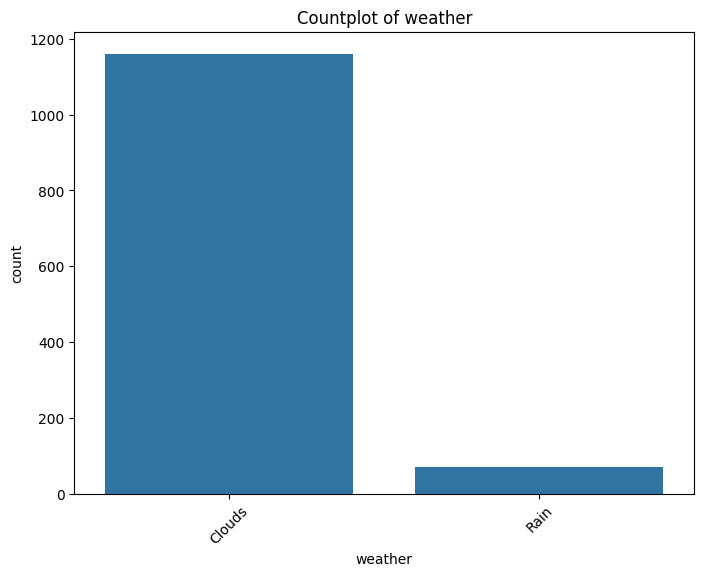

In [97]:
# Visualizing categorical features using countplot
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

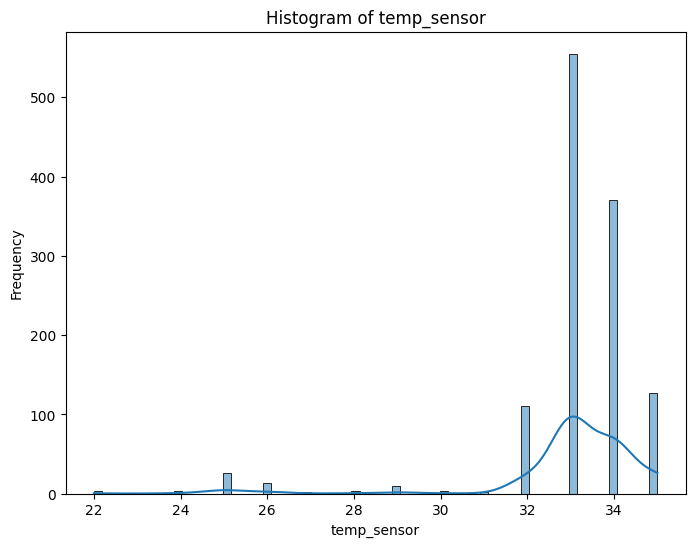

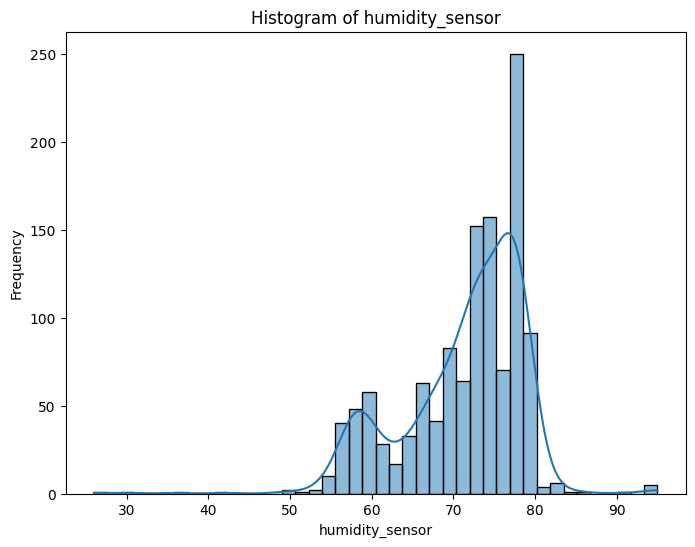

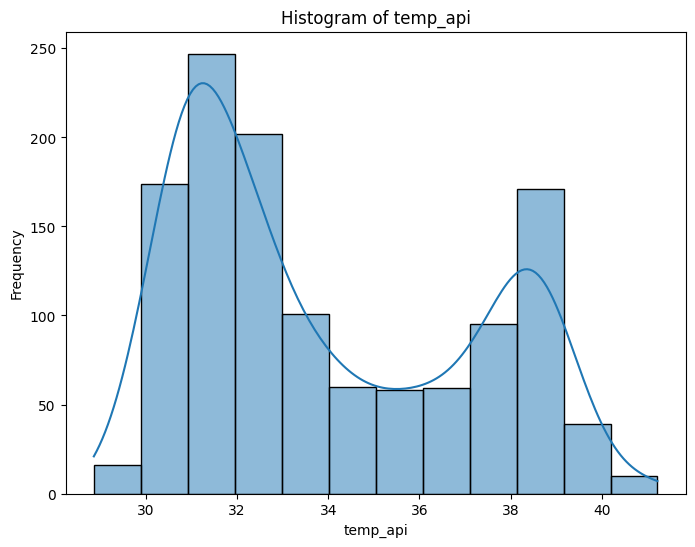

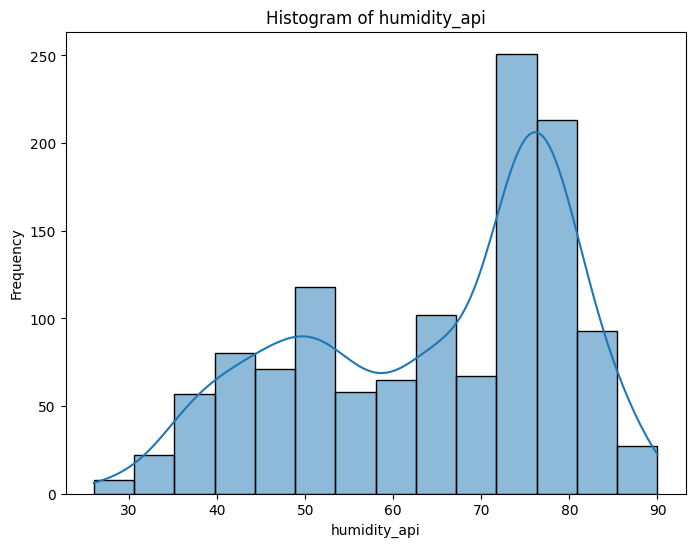

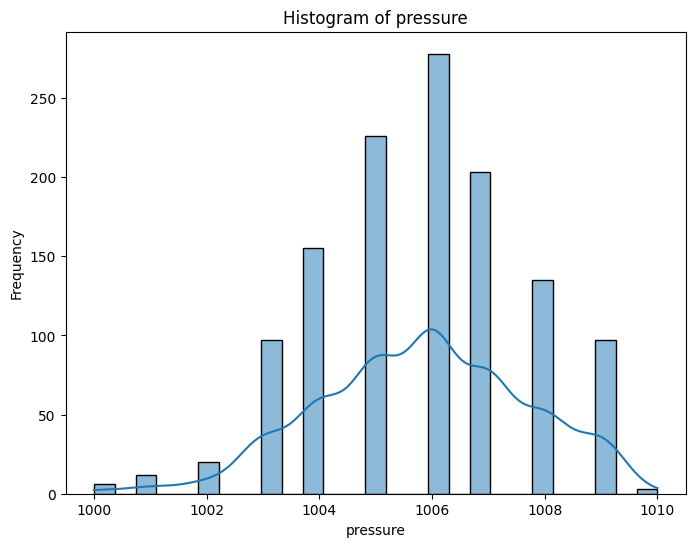

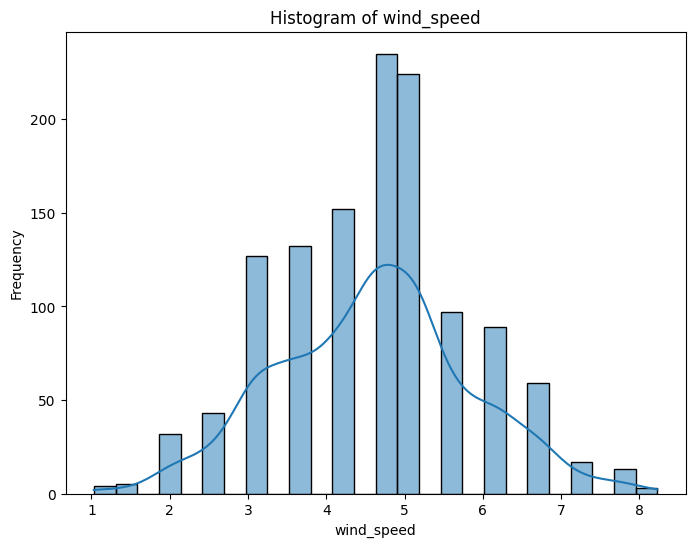

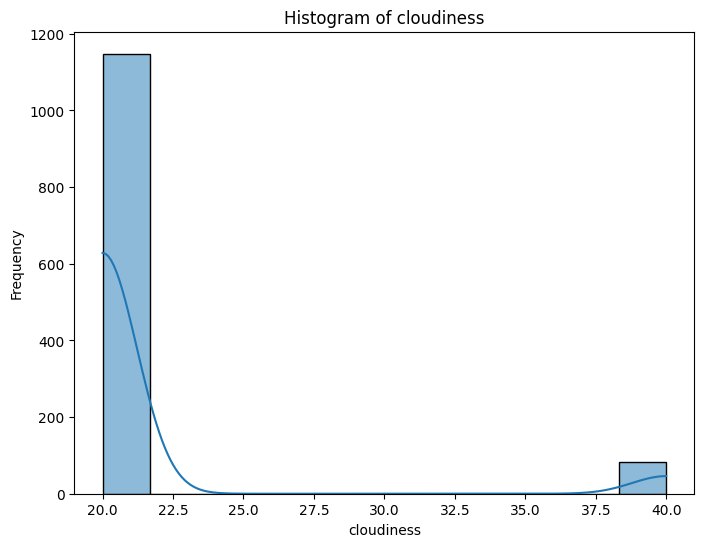

In [98]:
# Visualizing numerical features using histogram plot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

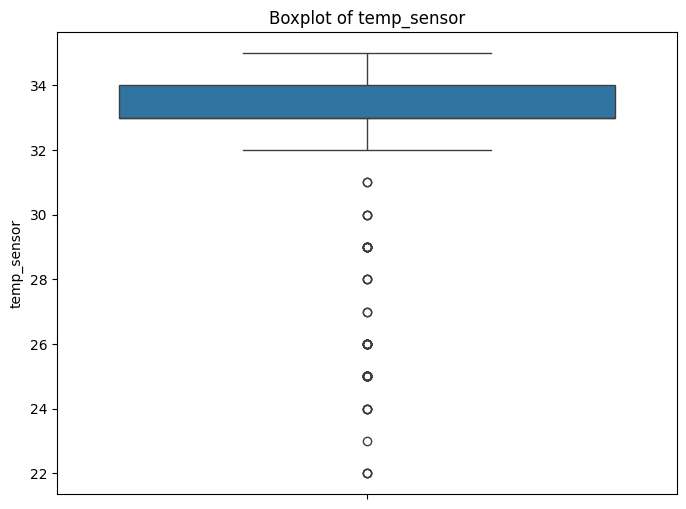

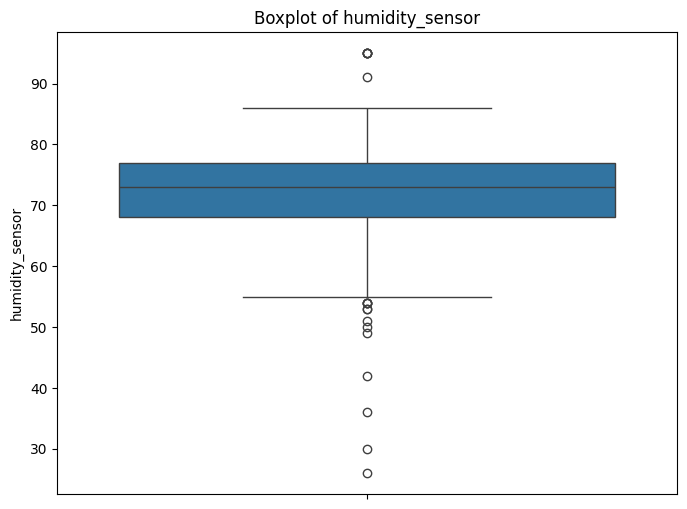

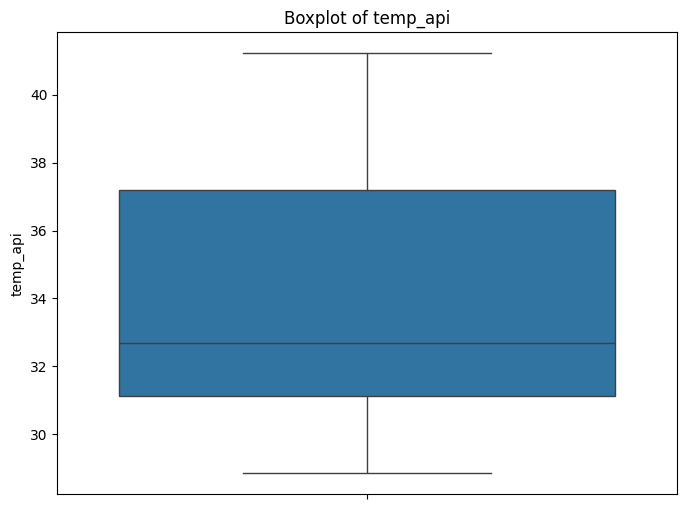

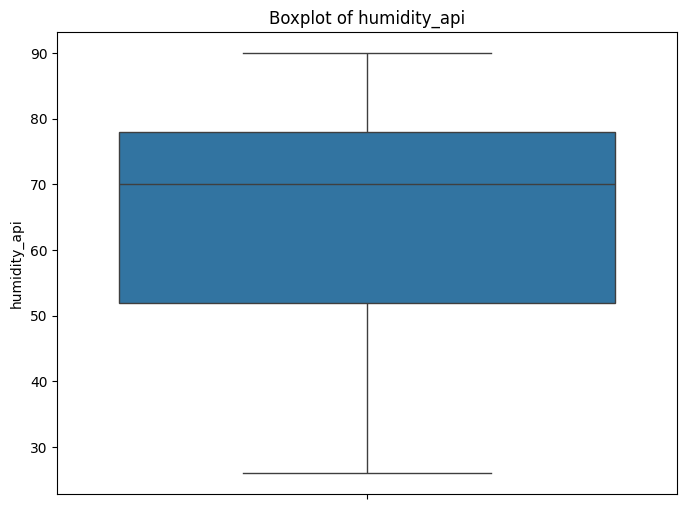

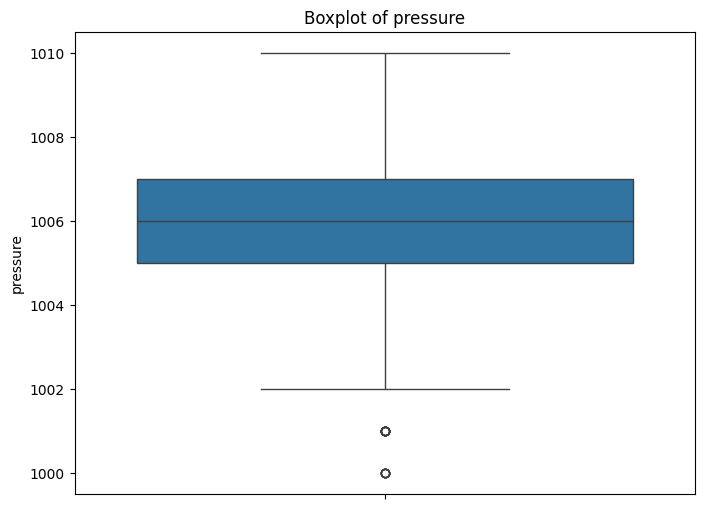

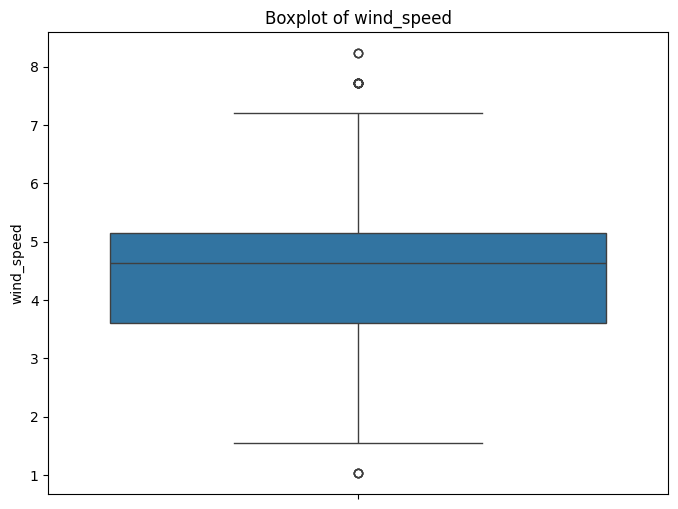

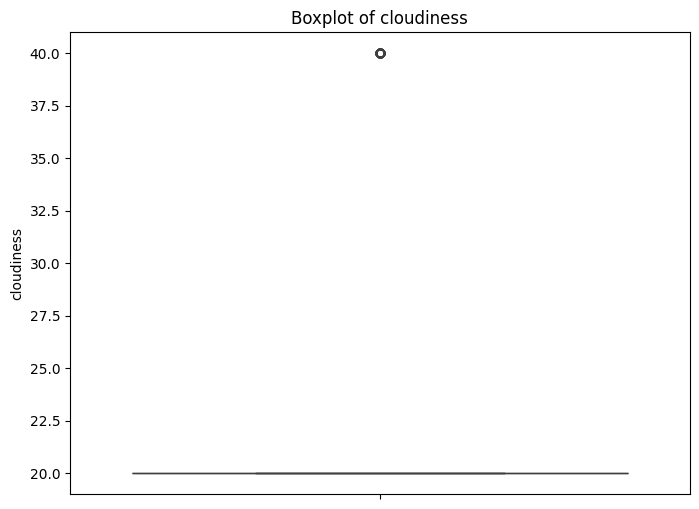

In [132]:
# Visualizing numerical features using boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

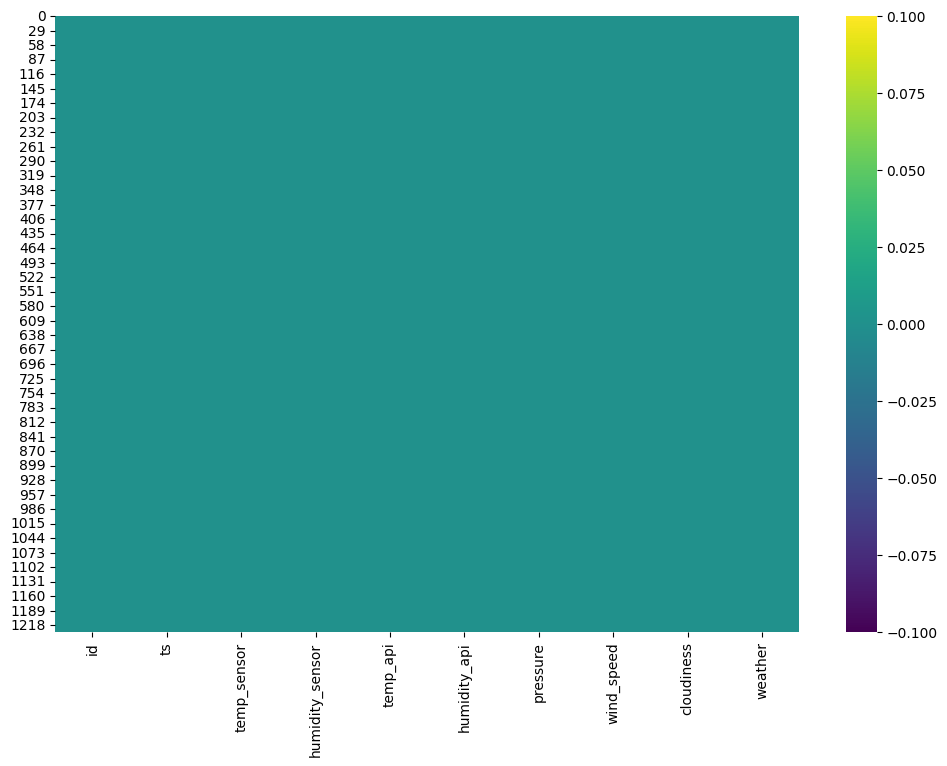

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.isnull(), cmap="viridis")
plt.show()

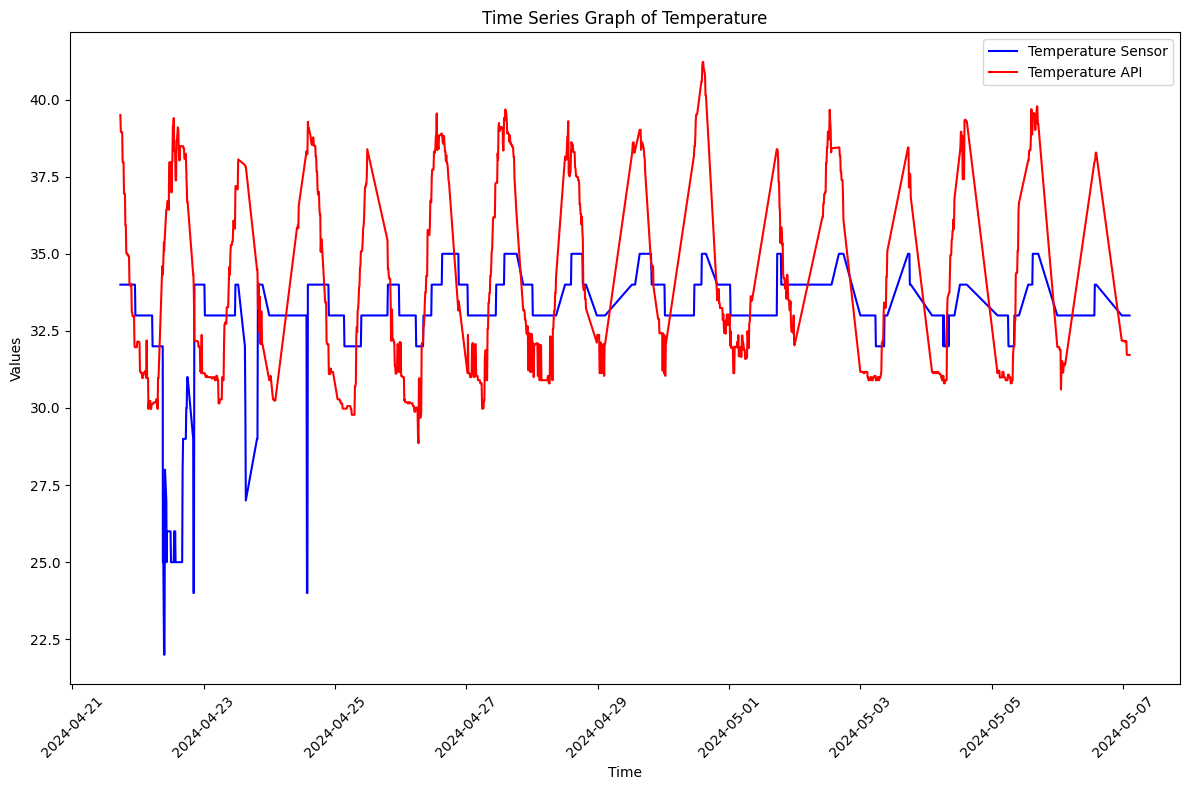

In [101]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['temp_sensor'], label='Temperature Sensor', color='blue')
plt.plot(data['ts'], data['temp_api'], label='Temperature API', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Temperature')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

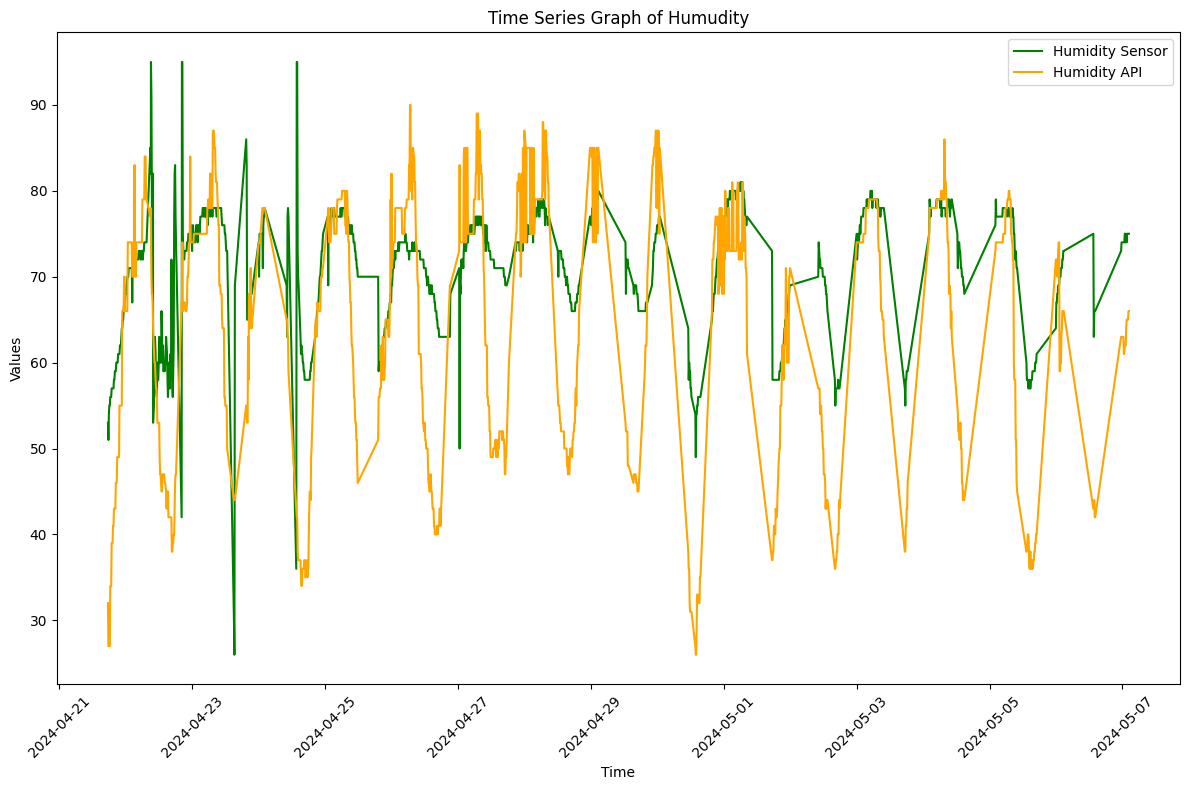

In [102]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['humidity_sensor'], label='Humidity Sensor', color='green')
plt.plot(data['ts'], data['humidity_api'], label='Humidity API', color='orange')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Humudity')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

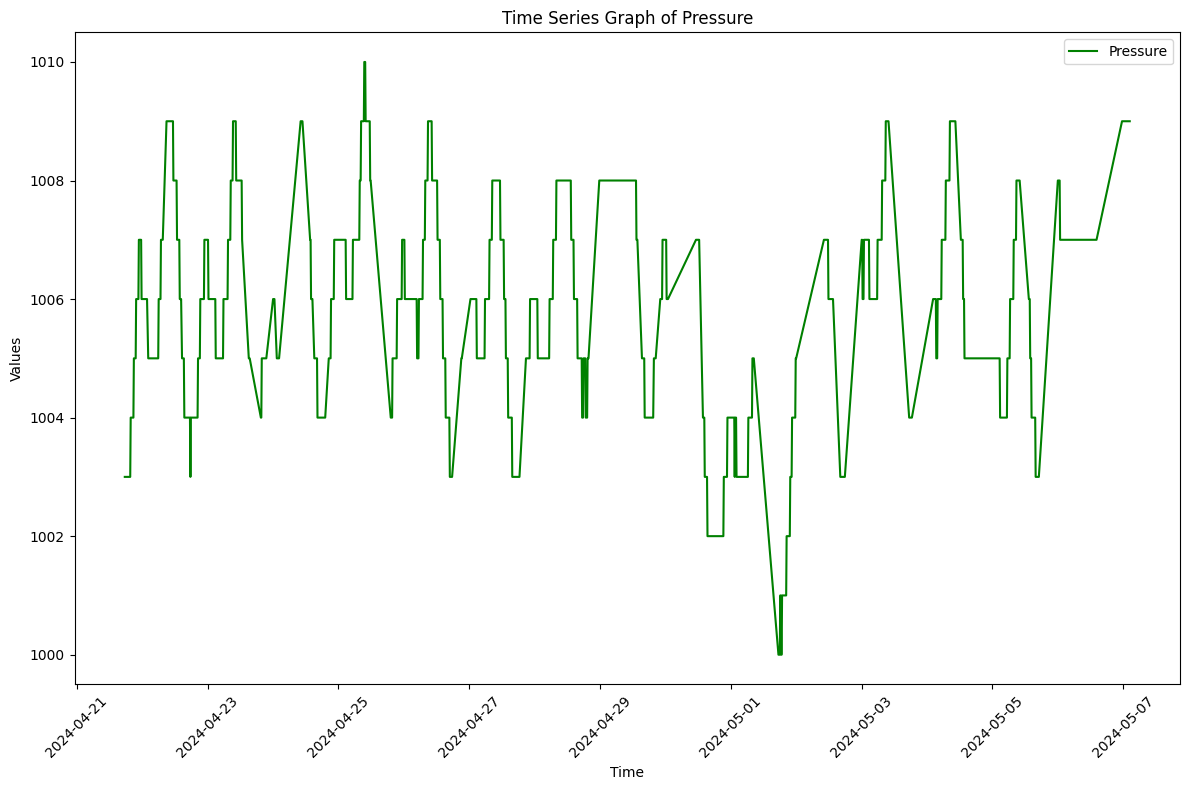

In [103]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['pressure'], label='Pressure', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Pressure')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

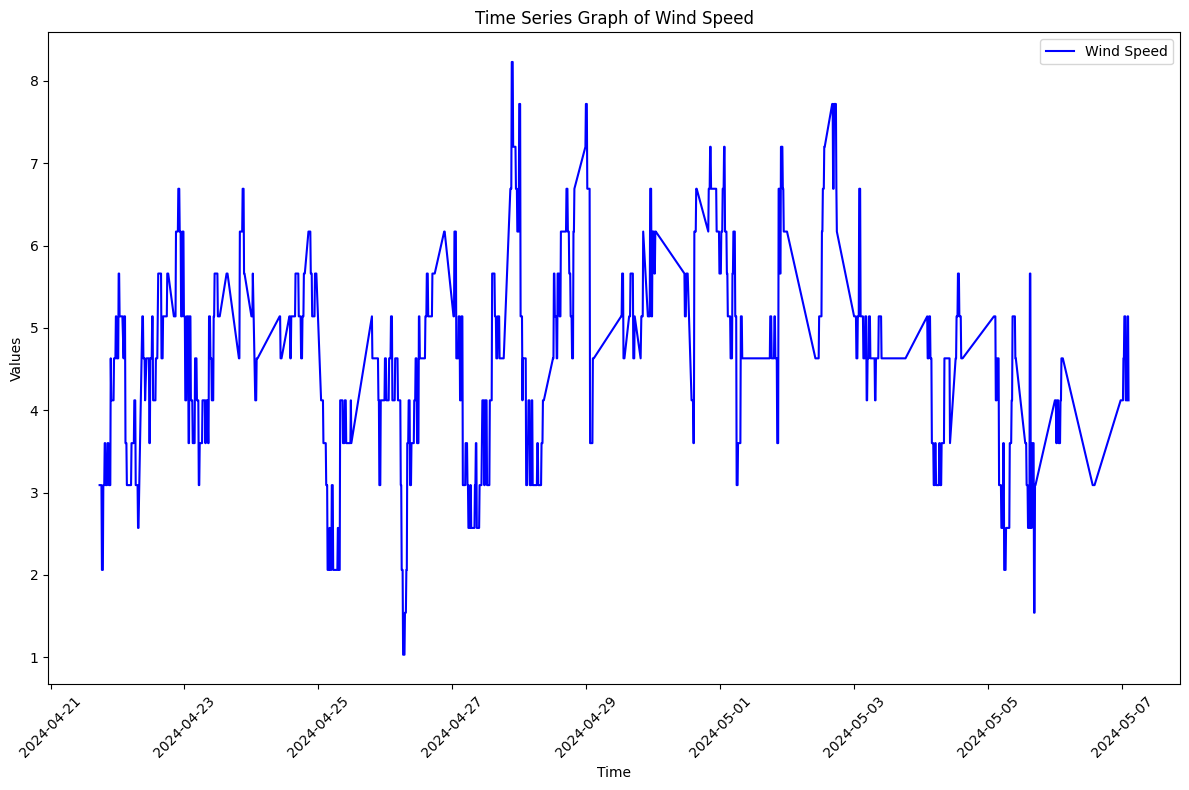

In [104]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['wind_speed'], label='Wind Speed', color='Blue')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Wind Speed')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

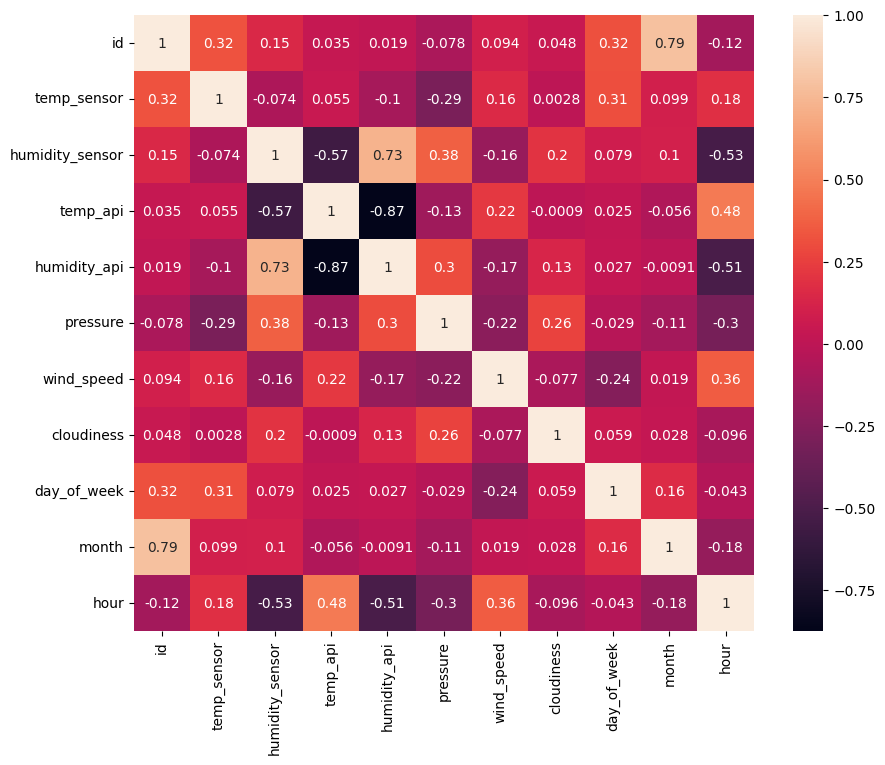

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.drop("weather", axis=1).corr(), annot=True,)
plt.show()

In [106]:
overall_percent_error = (abs(data["temp_api"] - data["temp_sensor"]) / data["temp_api"]).mean() * 100
print(overall_percent_error)

7.752411035199555


In [107]:
overall_percent_error = (abs(data["humidity_api"] - data["humidity_sensor"]) / data["humidity_api"]).mean() * 100
print(overall_percent_error)

19.212250860639962


# Preprocessing

In [108]:
data.dtypes

id                          int64
ts                 datetime64[ns]
temp_sensor                 int64
humidity_sensor             int64
temp_api                  float64
humidity_api                int64
pressure                    int64
wind_speed                float64
cloudiness                  int64
weather                    object
dtype: object

In [109]:
display(data.head())

,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-21 17:34:59,34,53,39.50,32,1003,3.09,20,Clouds
1,2,2024-04-21 17:44:59,34,51,38.98,27,1003,3.09,20,Clouds
2,3,2024-04-21 17:55:00,34,54,38.94,27,1003,3.09,20,Clouds
3,4,2024-04-21 18:05:00,34,55,38.94,27,1003,3.09,20,Clouds
4,5,2024-04-21 18:15:00,34,55,38.94,27,1003,3.09,20,Clouds


In [110]:
data["day_of_week"] = data["ts"].dt.dayofweek
data["month"] = data["ts"].dt.month
data["hour"] = data["ts"].dt.hour

data.drop("ts", axis=1, inplace=True)
display(data.head())

,id,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather,day_of_week,month,hour
0,1,34,53,39.50,32,1003,3.09,20,Clouds,6,4,17
1,2,34,51,38.98,27,1003,3.09,20,Clouds,6,4,17
2,3,34,54,38.94,27,1003,3.09,20,Clouds,6,4,17
3,4,34,55,38.94,27,1003,3.09,20,Clouds,6,4,18
4,5,34,55,38.94,27,1003,3.09,20,Clouds,6,4,18


# Modeling

In [111]:
X = data.drop(["weather"], axis=1)
y = data["weather"]

In [112]:
display(X)
display(y)

,id,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,day_of_week,month,hour
0,1,34,53,39.50,32,1003,3.09,20,6,4,17
1,2,34,51,38.98,27,1003,3.09,20,6,4,17
2,3,34,54,38.94,27,1003,3.09,20,6,4,17
3,4,34,55,38.94,27,1003,3.09,20,6,4,18
4,5,34,55,38.94,27,1003,3.09,20,6,4,18
...,...,...,...,...,...,...,...,...,...,...,...
1227,1228,33,75,31.72,65,1009,4.12,20,1,5,1
1228,1229,33,75,31.72,65,1009,4.12,20,1,5,1
1229,1230,33,75,31.72,65,1009,5.14,20,1,5,2
1230,1231,33,75,31.72,66,1009,5.14,20,1,5,2


0       Clouds
1       Clouds
2       Clouds
3       Clouds
4       Clouds
         ...  
1227    Clouds
1228    Clouds
1229    Clouds
1230    Clouds
1231    Clouds
Name: weather, Length: 1232, dtype: object

In [113]:
# Scale data (X)
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
display(X_scaled)

array([[-1.73064549,  0.50427673, -2.47938085, ...,  1.38034616,
        -0.65263001,  0.92685263],
       [-1.72783372,  0.50427673, -2.75035865, ...,  1.38034616,
        -0.65263001,  0.92685263],
       [-1.72502195,  0.50427673, -2.34389195, ...,  1.38034616,
        -0.65263001,  0.92685263],
       ...,
       [ 1.72502195, -0.0208872 ,  0.50137491, ..., -0.9776495 ,
         1.53226176, -1.18617927],
       [ 1.72783372, -0.0208872 ,  0.50137491, ..., -0.9776495 ,
         1.53226176, -1.18617927],
       [ 1.73064549, -0.0208872 ,  0.50137491, ..., -0.9776495 ,
         1.53226176, -1.18617927]])

In [114]:
# PCA
pca = PCA()
pca.fit(X_scaled)


PCA()

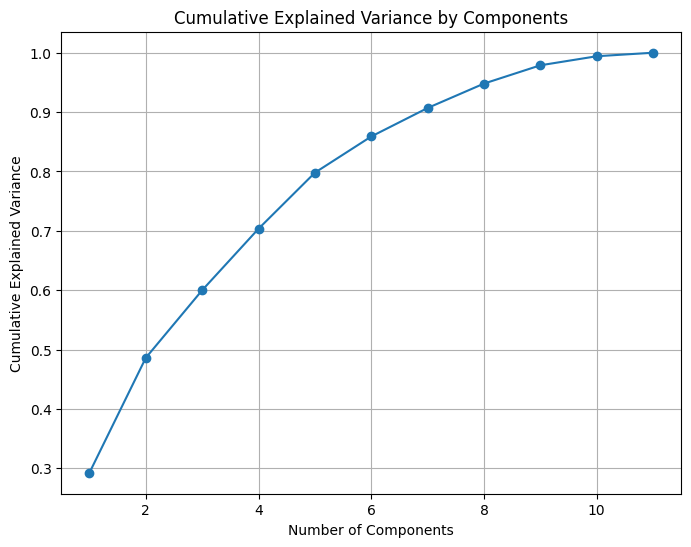

In [115]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [116]:
pca = None
pca = PCA(n_components=5)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
display(X_pca)

array([[ 3.68877749,  0.65378081,  1.46287849, -2.27786748, -1.09444746],
       [ 3.90318374,  0.66257182,  1.50886038, -2.28740832, -1.19992622],
       [ 3.70942147,  0.63612928,  1.47422072, -2.26933104, -1.11980916],
       ...,
       [-1.53004132, -1.34227972, -0.07182312,  2.10431766, -0.4178293 ],
       [-1.56270357, -1.3421029 , -0.09003667,  2.09928921, -0.40715266],
       [-1.75135592, -1.29976406,  0.26678676,  1.77547325, -0.80171691]])

In [117]:
# Using smote
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

display(X_resampled)
display(y_resampled)

array([[ 3.68877749,  0.65378081,  1.46287849, -2.27786748, -1.09444746],
       [ 3.90318374,  0.66257182,  1.50886038, -2.28740832, -1.19992622],
       [ 3.70942147,  0.63612928,  1.47422072, -2.26933104, -1.11980916],
       ...,
       [ 0.02208421, -0.1538091 , -1.11829177, -0.76618644,  1.6234749 ],
       [ 0.15432177, -0.21263073, -1.61579477, -0.24633693,  2.25901362],
       [ 0.94549349, -0.10917355, -2.0556685 ,  0.28317698,  1.29562329]])

0       Clouds
1       Clouds
2       Clouds
3       Clouds
4       Clouds
         ...  
2317      Rain
2318      Rain
2319      Rain
2320      Rain
2321      Rain
Name: weather, Length: 2322, dtype: object

# Old

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [119]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
display(y_train_encoded)

array([1, 1, 0, ..., 0, 0, 0])

In [120]:
display(X_train)
display(y_train_encoded)

array([[-1.33470018,  1.25062098, -1.00777578, -0.00315278,  0.34260551],
       [ 0.84546816, -0.06673265, -1.91392157,  0.2683309 ,  1.25323366],
       [ 1.33970711,  0.48091328,  0.43313155,  0.85804554,  0.19127866],
       ...,
       [-1.32700239, -1.74792766,  0.87750544,  0.86626538, -0.14896353],
       [-0.4593855 ,  1.4117904 ,  1.8316417 ,  1.43197743,  3.13499598],
       [-1.71253671, -2.07883252, -0.59522691,  0.15607559, -0.61559821]])

array([1, 1, 0, ..., 0, 0, 0])

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'n_estimators': range(10, 201, 10)
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best score
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print("Best Number of Estimators:", best_n_estimators)
print("Best Accuracy Score:", best_score)

Best Number of Estimators: 120
Best Accuracy Score: 0.9736182360954121


In [123]:
rf_classifier = None
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=1)
rf_classifier.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=120, random_state=1)

In [124]:
from sklearn.tree import plot_tree

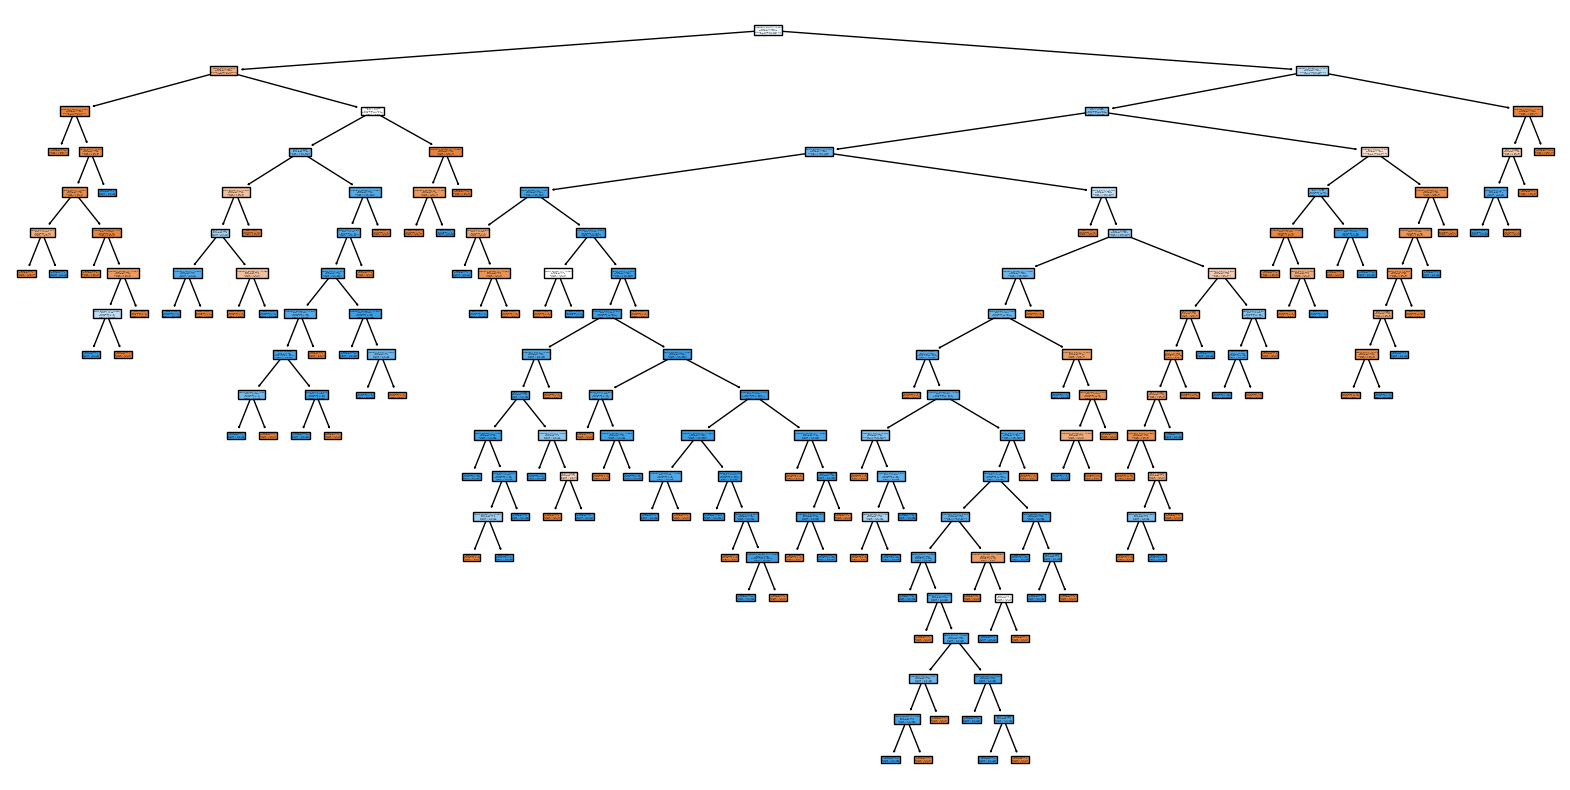

In [125]:
tree_index = 0

plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[tree_index], feature_names=data.drop("weather", axis=1).columns, class_names=y_train.unique(), filled=True)
plt.show()

In [126]:
predictions_encoded = rf_classifier.predict(X_test)
predictions = label_encoder.inverse_transform(predictions_encoded)
display(predictions)

array(['Clouds', 'Rain', 'Rain', 'Rain', 'Clouds', 'Rain', 'Clouds',
       'Rain', 'Rain', 'Rain', 'Clouds', 'Clouds', 'Rain', 'Rain',
       'Clouds', 'Clouds', 'Rain', 'Clouds', 'Clouds', 'Clouds', 'Rain',
       'Rain', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Rain', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Rain', 'Clouds', 'Rain',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Rain', 'Rain', 'Clouds',
       'Clouds', 'Rain', 'Rain', 'Rain', 'Clouds', 'Rain', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds', 'Rain', 'Clouds', 'Clouds', 'Rain', 'Clouds',
       'Clouds', 'Clouds', 'Rain', 'Clouds', 'Rain', 'Rain', 'Clouds',
       'Rain', 'Clouds', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain',
       'Clouds', 'Clouds', 'Rain', 'Clouds', 'Rain', 'Rain', 'Rain',
       'Rain', 'Rain', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Rain',
       'Clouds', 'Rain', 'Clouds', 'Rain', 'Clouds', 'Rain', 'Rain',
       'Ra

# Evaluate The model

In [127]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("-----------------------------------------------------------")
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)
print("-----------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9741935483870968
-----------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      Clouds       0.98      0.97      0.98       244
        Rain       0.96      0.98      0.97       221

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

-----------------------------------------------------------
Confusion Matrix:
 [[236   8]
 [  4 217]]


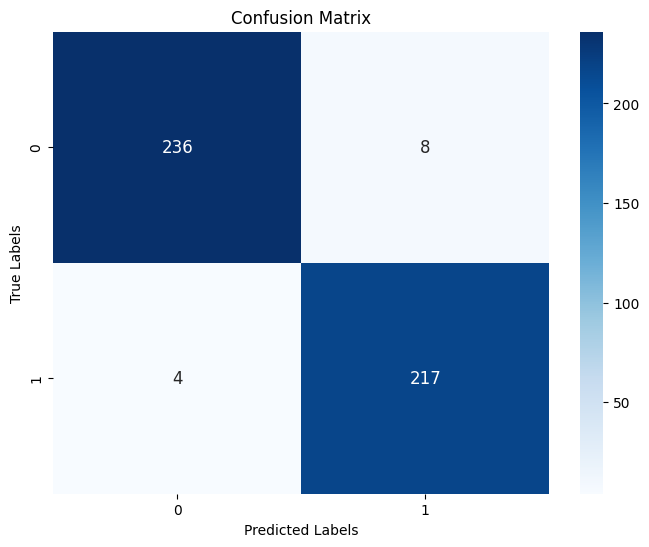

In [128]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [129]:
from tabulate import tabulate

# Export Model

In [130]:
joblib.dump(rf_classifier, 'model.pkl')
joblib.dump(label_encoder, 'label_encoder_model.pkl')
joblib.dump(standard_scaler, 'standard_scaler_model.pkl')
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']